In [1]:
import json
import sys, re

import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

from pprint import pprint

In [2]:
def albumsplaycount(artist, code):
    tot_d = {}
    
    try:
        limit = 15
        urlraw = f'http://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist={artist}&api_key=70894b101e887cf7fd9443bd5067f675&format=json&limit={limit}'

        r = requests.get(urlraw)
        tmp = r.json()
        # pprint(tmp)

        data = {}
        for i in range(limit):
            data[tmp['topalbums']['album'][i]['name']] = tmp['topalbums']['album'][i]['playcount']
        # print(data)
    except:
        if artist == '':
            pass
        else:
            print('your artist is WRONG')
    else:
        names = list(data.keys())
        values = list(data.values())

        fig, ax = plt.subplots()
        
        ax.set_title(f'Top {limit} {artist} Albums and Playcount')
        ax.bar(range(len(data)), values, tick_label=names, color=code)
        
        ax.set_xticklabels(names, rotation = 90)
        ax.ticklabel_format(axis='y', style='plain')
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: format(int(y), ',')))

        plt.show()
        
        tot_d[artist] = sum(values)
    finally:
        return tot_d

In [3]:
def main_bars(artist0, artist1):
    color0 = '#e3122e'
    tot0 = albumsplaycount(artist0, color0)
    # print(tot0)
    
    color1 = '#102ede'
    tot1 = albumsplaycount(artist1, color1)
    # print(tot1)
    
    tot0.update(tot1)
    
    if len(tot0) > 1:
        print(f'{max(tot0, key=tot0.get)} is the more popular artist!')

In [4]:
"""let user pick any number of artists and respective songs"""
artist0 = 'Drake'
artist1 = 'Coldplay'

# artist0 = input('pick artist? ').title()
# artist1 = input('pick artist? ').title()

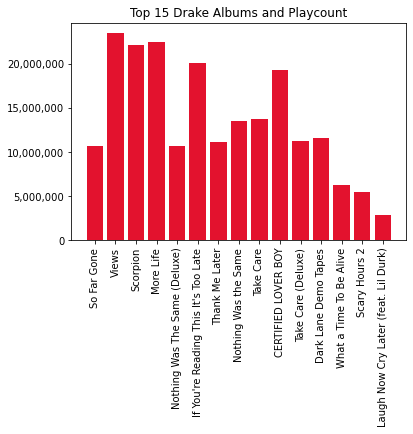

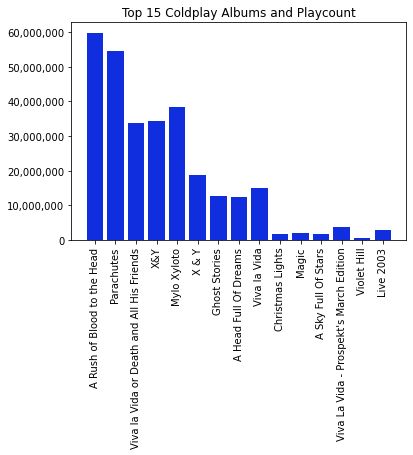

Coldplay is the more popular artist!


In [5]:
"""call your functions"""
main_bars(artist0, artist1)